In [1]:
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statistics import mean

In [2]:
with open("elastic_cpu.p", "rb") as f:
    cpu_data = pickle.load(f)
with open("cpus.p", "rb") as f:
    mongo_cpu_data = pickle.load(f)

In [3]:
with open ("elastic_mem.p", "rb") as f:
    mem_data = pickle.load(f)
with open("mem.p", "rb") as f:
    mongo_mem_data = pickle.load(f)

In [4]:
#pprint(cpu_data['cpu_usage'])
#pprint(mem_data['memory_usage'][0])

cpu_data = cpu_data['cpu_usage']
percent_memory_usage = []
for i in mem_data['memory_usage']:
    percent_memory_usage.append([i[0], i[1]['percent']])
    
mongo_cpu_data = mongo_cpu_data['cpu_usage']
percent_mongo_mem_usage = []
for i in mongo_mem_data['memory_usage']:
    percent_mongo_mem_usage.append([i[0], i[1]['percent']])

for i in range(len(cpu_data)):
    print(cpu_data[i], percent_memory_usage[i])
    
for i in range(len(mongo_cpu_data)):
    print(mongo_cpu_data[i])
    

['10-02-2020 (10:38:26.460737)', 1.98] ['10-02-2020 (10:38:26.460737)', 21.2]
['10-02-2020 (11:04:12.736909)', 1.0] ['10-02-2020 (11:04:12.736909)', 21.4]
['10-02-2020 (11:31:44.214334)', 10.95] ['10-02-2020 (11:31:44.214334)', 21.4]
['10-02-2020 (11:59:31.760343)', 2.9799999999999995] ['10-02-2020 (11:59:31.760343)', 21.4]
['10-02-2020 (12:27:56.444301)', 0.99] ['10-02-2020 (12:27:56.444301)', 21.4]
['10-02-2020 (12:56:08.409952)', 1.98] ['10-02-2020 (12:56:08.409952)', 21.5]
['10-02-2020 (13:24:45.237465)', 1.0] ['10-02-2020 (13:24:45.237465)', 21.4]
['10-02-2020 (13:54:09.668461)', 1.9899999999999998] ['10-02-2020 (13:54:09.668461)', 21.3]
['10-02-2020 (14:23:04.063187)', 9.940000000000001] ['10-02-2020 (14:23:04.063187)', 21.4]
['10-02-2020 (14:52:57.735039)', 0.99] ['10-02-2020 (14:52:57.735039)', 21.4]
['10-02-2020 (15:21:44.854447)', 56.71] ['10-02-2020 (15:21:44.854447)', 21.3]
['10-02-2020 (15:50:32.686170)', 0.0] ['10-02-2020 (15:50:32.686170)', 21.1]
['10-02-2020 (16:20:38.1

1.546
59.75
1.7 documents a second


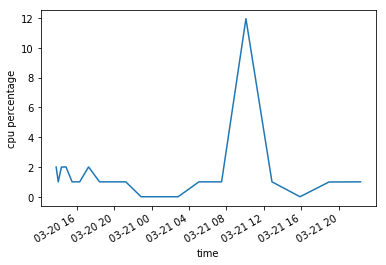

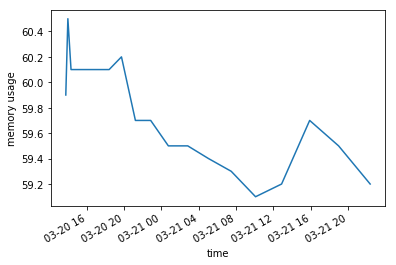

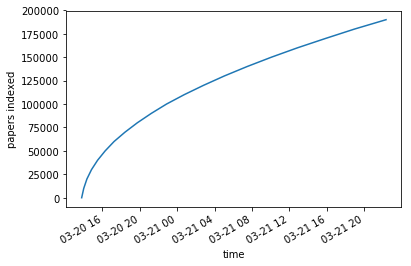

In [11]:
dates = []
cdata = []


for l in mongo_cpu_data:
    dates.append(datetime.strptime(l[0], "%d-%m-%Y (%H:%M:%S.%f)"))
    cdata.append(l[1])
    
mdata = []
for m in percent_mongo_mem_usage:
    mdata.append(m[1])
    
    
num_papers = []
total = 0
for i in dates:
    num_papers.append(total)
    total = total + 10000

print(mean(cdata))
print(mean(mdata))
print("1.7 documents a second")

fig, ax = plt.subplots()
ax.plot(dates, cdata)
ax.set_xlabel('time')
ax.set_ylabel('cpu percentage')
fig.autofmt_xdate()
plt.savefig('elastic_cpu.jpg')
plt.show()


fig, ax = plt.subplots()
ax.plot(dates, mdata)
ax.set_xlabel('time')
ax.set_ylabel('memory usage')
fig.autofmt_xdate()
plt.savefig('elastic_mem.jpg')
plt.show()


fig, ax = plt.subplots()
ax.plot(dates, num_papers)
ax.set_xlabel('time')
ax.set_ylabel('papers indexed')
fig.autofmt_xdate()
plt.savefig('elastic_total_papers.jpg')
plt.show()


6.3506
20.892
6.06 documents a second


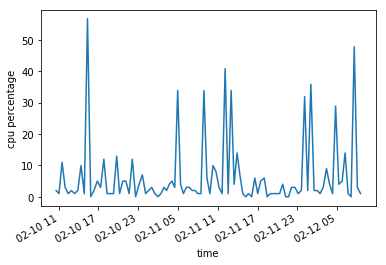

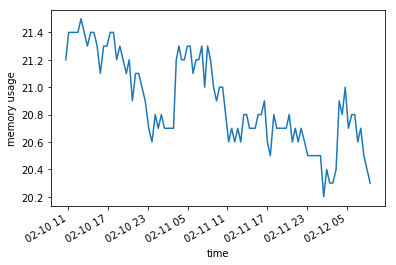

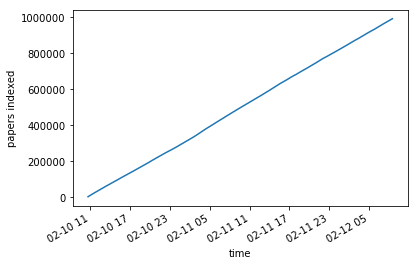

In [10]:

dates = []
cdata = []


for l in cpu_data:
    dates.append(datetime.strptime(l[0], "%d-%m-%Y (%H:%M:%S.%f)"))
    cdata.append(l[1])
    
mdata = []
for m in percent_memory_usage:
    mdata.append(m[1])
    
    
num_papers = []
total = 0
for i in dates:
    num_papers.append(total)
    total = total + 10000

    
    
print(mean(cdata))
print(mean(mdata))
print("6.06 documents a second")
    
fig, ax = plt.subplots()
ax.plot(dates, cdata)
ax.set_xlabel('time')
ax.set_ylabel('cpu percentage')
fig.autofmt_xdate()
plt.savefig('mongo_cpu.jpg')
plt.show()



fig, ax = plt.subplots()
ax.plot(dates, mdata)
ax.set_xlabel('time')
ax.set_ylabel('memory usage')
fig.autofmt_xdate()
plt.savefig('mongo_mem.jpg')
plt.show()


fig, ax = plt.subplots()
ax.plot(dates, num_papers)
ax.set_xlabel('time')
ax.set_ylabel('papers indexed')
fig.autofmt_xdate()
plt.savefig('mongo_total_papers.jpg')
plt.show()

